## SBP-SAT scheme for numerical solutions to the 2D linearised shallow water equations 

### theory 
explain scheme


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
import math
## initialise parameters: domain, coefficients etc 
lx=10; ly=10   ## domain length
nx=201; ny=201
u0= 2; v0=0; g=9.8;H=1 

In [2]:
## utilities 


## decimal range step value function 
def drange(start, stop, step):
    r = start
    while r < stop:
        yield r
        r += step


In [3]:
## 2D SBP operators 
def dy2d( u, ny, dy, order):
    # summation-by-parts finite difference operators for first derivatives du/dx
    uy=u*0     ##initiate partial derivitive vector 
    m = ny-1
    
    # second order accurate case
    if order==2:
        # calculate partial derivatives on the boundaries:[0, m] with one-sided difference operators

        
        uy[0,:] = (u[1, :] -  u[0,:])/dy

        
        uy[m,:] = (u[m,:] -  u[m-1,:])/dy
        
        #calculate partial derivatives in the interior:(1:nx-1)
        for i in range(1,m):
            uy[i,:] = (u[i+1, :] -  u[i-1, :])/(2.0*dy)
    if order==4:
        ################################################# 
        # calculate partial derivatives on the boundaries:(0,1,2,3, : m-3, m-2, m-1, m)
        # with one-sided difference operators

        
        uy[0,:] = -24./17*u[0,:] + 59./34*u[1, :]  - 4./17*u[2, :] - 3./34*u[3,:]

        
        uy[1,:] = -1./2*u[0,:] + 1./2*u[2, :]

        
        uy[2,:] = 4./43*u[0,:] - 59./86*u[1, :]  + 59./86*u[3, :] - 4./43*u[4,:]

            
        uy[3,:] = 3./98*u[0,:] - 59./98*u[2, :]  + 32./49*u[4,:] - 4./49*u[5,:]
         

        
        uy[m,:] = 24./17*u[m,:] - 59./34*u[m-1, :]  + 4./17*u[m-2, :] + 3./34*u[m-3,:]

        
        uy[m-1,:] = 1./2*u[m,:] - 1./2*u[m-2, :]

        
        uy[m-2,:] = -4./43*u[m,:] + 59./86*u[m-1, :]- 59./86*u[m-3, :]+ 4./43*u[m-4,:]

        
        uy[m-3,:] = -3./98*u[m,:] + 59./98*u[m-2,:]- 32./49*u[m-4, :]+ 4./49*u[m-5,:]
    
          
        #------------------------------------------------------------------------------------------------------------------------------
        
        for i in range(3,m-3):
            uy[i,:] = 0.083333333333333*u[i-2,:] - 0.666666666666667*u[i-1,:] + 0.666666666666667*u[i+1,:] - 0.083333333333333*u[i+2,:]

        uy = uy/dy
        
    return uy 
def dx2d( u, nx, dx, order):
    # summation-by-parts finite difference operators for first derivatives du/dy
    ux=0*u
    m = nx-1


    if order == 2:

    
       ux[:,0]= u[:,1]-u[:,0]

            
       ux[:,m] = u[:,m]-u[:,m-1]
        
       for j in range(1,m):
      
            ux[:,j] = 0.5*(u[:, j+1] - u[:, j-1])
   
       ux= ux/dx
    if order == 4:
        
        
        ux[:,0] = -24.0/17.0*u[:,0] + 59.0/34.0*u[:,1]  - 4.0/17.0*u[:, 2] - 3.0/34.0*u[:, 3]
            
        
        ux[:,1] = -1.0/2.0*u[:,0] + 1.0/2.0*u[:,2]

        
        ux[:,2] = 4.0/43.0*u[:,0] - 59.0/86.0*u[:,1]  + 59.0/86.0*u[:,3] - 4.0/43.0*u[:,4]

        
        ux[:,3] = 3.0/98.0*u[:,0] - 59.0/98.0*u[:,2]  + 32.0/49.0*u[:,4] - 4.0/49.0*u[:,5]

        
        ux[:,m] = 24.0/17.0*u[:,m] - 59.0/34.0*u[:,m-1]  + 4.0/17.0*u[:,m-2] + 3.0/34.0*u[:,m-3]

            
        ux[:,m-1] = 1.0/2.0*u[:,m] - 1.0/2.0*u[:,m-2]

            
        ux[:,m-2] = -4.0/43.0*u[:,m] + 59.0/86.0*u[:,m-1]  - 59.0/86.0*u[:,m-3] + 4.0/43.0*u[:,m-4]

            
        ux[:,m-3] = -3.0/98.0*u[:,m] + 59.0/98.0*u[:,m-2]  - 32.0/49.0*u[:,m-4] + 4.0/49.0*u[:,m-5]

        for j in range(3,m-3):
            ux[:,j] = 1.0/12.0*u[:,j-2] - 2.0/3.0*u[:,j-1]  + 2.0/3.0*u[:,j+1] - 1.0/12.0*u[:,j+2]
    

        ux = ux/dx
    if order == 6: 
           ## calcutate partials on boundary 
        
            
        ux[:,0] = -1.694834962162858*u[:,0] + 2.245634824947698*u[:,1] - 0.055649692295628*u[:,2] - 0.670383570370653*u[:,3]\
                    - 0.188774952148393*u[:,4] + 0.552135032829910*u[:,5] - 0.188126680800077*u[:,6]

       
        ux[:,1] = -0.434411786832708*u[:,0] + 0.107043134706685*u[:,2] + 0.420172642668695*u[:,3] + 0.119957288069806*u[:,4]\
                    - 0.328691543801578*u[:,5] + 0.122487487014485*u[:,6] - 0.006557221825386*u[:,7]

        
        ux[:,2] = 0.063307644169533*u[:,0] - 0.629491308812471*u[:,1] + 0.809935419586724*u[:,3] - 0.699016381364484*u[:,4]\
                + 0.850345731199969*u[:,5] - 0.509589652965290*u[:,6] + 0.114508548186019*u[:,7]
        
        
        ux[:,3] = 0.110198643174386*u[:,0] - 0.357041083340051*u[:,1] - 0.117033418681039*u[:,2] + 0.120870009174558*u[:,4]\
                    + 0.349168902725368*u[:,5] - 0.104924741749615*u[:,6] - 0.001238311303608*u[:,7]

        
        ux[:,4] = 0.133544619364965*u[:,0] - 0.438678347579289*u[:,1] + 0.434686341173840*u[:,2] - 0.520172867814934*u[:,3]\
                    + 0.049912002176267*u[:,5] + 0.504693510958978*u[:,6] - 0.163985258279827*u[:,7]

       
        ux[:,5] = -0.127754693486067*u[:,0] + 0.393149407857401*u[:,1] - 0.172955234680916*u[:,2] - 0.491489487857764*u[:,3]\
                      - 0.016325050231672*u[:,4] + 0.428167552785852*u[:,6] - 0.025864364383975*u[:,7] + 0.013071869997141*u[:,8]

        
        ux[:,6] = 0.060008241515128*u[:,0] - 0.201971348965594*u[:,1] + 0.142885356631256*u[:,2] + 0.203603636754774*u[:,3]\
                      - 0.227565385120003*u[:,4] - 0.590259111130048*u[:,5] + 0.757462553894374*u[:,7] - 0.162184436527372*u[:,8]\
                      + 0.018020492947486*u[:,9]

        
        ux[:,7] = 0.009910488565285*u[:,1] - 0.029429452176588*u[:,2] + 0.002202493355677*u[:,3] + 0.067773581604826*u[:,4]\
                      + 0.032681945726690*u[:,5] - 0.694285851935105*u[:,6] + 0.743286642396343*u[:,8] - 0.148657328479269*u[:,9]\
                      + 0.016517480942141*u[:,10]

        
        ux[:,m-7] =-0.016517480942141*u[:,m-10] + 0.148657328479269*u[:,m-9] - 0.743286642396343*u[:,m-8] + 0.694285851935105*u[:,m-6]\
                - 0.032681945726690*u[:,m-5] - 0.067773581604826*u[:,m-4] - 0.002202493355677*u[:,m-3] + 0.029429452176588*u[:,m-2]\
                - 0.009910488565285*u[:,m-1]

       
        ux[:,m-6] =-0.018020492947486*u[:,m-9] + 0.162184436527372*u[:,m-8] - 0.757462553894374*u[:,m-7] + 0.590259111130048*u[:,m-5]\
                + 0.227565385120003*u[:,m-4] - 0.203603636754774*u[:,m-3] - 0.142885356631256*u[:,m-2] + 0.201971348965594*u[:,m-1]\
                - 0.060008241515128*u[:,m]

        
        ux[:,m-5] =-0.013071869997141*u[:,m-8] + 0.025864364383975*u[:,m-7] - 0.428167552785852*u[:,m-6] + 0.016325050231672*u[:,m-4]\
            + 0.491489487857764*u[:,m-3] + 0.172955234680916*u[:,m-2] - 0.393149407857401*u[:,m-1] + 0.127754693486067*u[:,m]

        
        ux[:,m-4] = 0.163985258279827*u[:,m-7] - 0.504693510958978*u[:,m-6] - 0.049912002176267*u[:,m-5] + 0.520172867814934*u[:,m-3]\
                          - 0.434686341173840*u[:,m-2] + 0.438678347579289*u[:,m-1] - 0.133544619364965*u[:,m]

       
        ux[:,m-3] = 0.001238311303608*u[:,m-7] + 0.104924741749615*u[:,m-6] - 0.349168902725368*u[:,m-5] - 0.120870009174558*u[:,m-4]\
                          + 0.117033418681039*u[:,m-2] + 0.357041083340051*u[:,m-1] - 0.110198643174386*u[:,m]

        
        ux[:,m-2] =-0.114508548186019*u[:,m-7] + 0.509589652965290*u[:,m-6] - 0.850345731199969*u[:,m-5] + 0.699016381364484*u[:,m-4]\
                - 0.809935419586724*u[:,m-3] + 0.629491308812471*u[:,m-1] - 0.063307644169533*u[:,m]

        
        ux[:,m-1] = 0.006557221825386*u[:,m-7] - 0.122487487014485*u[:,m-6] + 0.328691543801578*u[:,m-5] - 0.119957288069806*u[:,m-4]\
                    - 0.420172642668695*u[:,m-3] - 0.107043134706685*u[:,m-2] + 0.434411786832708*u[:,m]
        
        
        ux[:,m]   = 0.188126680800077*u[:,m-6] - 0.552135032829910*u[:,m-5] + 0.188774952148393*u[:,m-4] + 0.670383570370653*u[:,m-3]\
                    + 0.055649692295628*u[:,m-2] - 2.245634824947698*u[:,m-1] + 1.694834962162858*u[:,m]
                       
        for j in range(7,m-7):
            ux[:,j] = -0.016666666666666667*u[:,j-3] + 0.15*u[:,j-2] - 0.75*u[:,j-1] + 0.75*u[:,j+1] - 0.15*u[:,j+2]\
            + 0.01666666666666667*u[:,j+3]
            
    
        ux = ux/dx

        
    
    return ux

In [4]:
##RHS of system: could be written in a single array, but for now i will write explicitly (easier to follow for me)
def rate(u,v,h,nx,ny,dx,dy,order,u0,v0,H,g,x,t): 
    ## rates from PDE
    ur= -(u0*dx2d( u, nx, dx, order)+g*dx2d( h, nx, dx, order)) -(v0*dy2d( u, ny, dy, order))
    
    vr= -(u0*dx2d( v, nx, dx, order)) -(v0*dy2d( v, ny, dy, order)+g*dy2d( h, ny, dy, order))
    
    hr= -(u0*dx2d( h, nx, dx, order)+H*dx2d( u, nx, dx, order)) - (H*dy2d( v, ny, dy, order)+v0*dy2d( h, ny, dy, order))
   
    # quadrature weights (note: dx=dy for our problem, but not always the case)
    if order==2:
        hx = 0.5*dx
        hy = 0.5*dy
        
    if order== 4:
        hx = (17.0/48.0)*dx
        hy = (17.0/48.0)*dy

    if order==6:
        hx = 13649.0/43200.0*dx
        hy = 13649.0/43200.0*dy
    
    
    #penalty weights  
    t1=u0/(hx*2); t2=u0/(hx*2); t3=g/(hx*2); t4=g/(hx*2); t5=-g/(hx*2); t6=g/(hx*2); t7=-g/(hx*2)  
    m= nx-1 
    #penalise boundary terms: 
    ## u (x boundary)
    ur[:,0] = ur[:,0] - t1*u[:,0]
    
    ## v (x boundary)
    vr[:,0] = vr[:,0] - t2*v[:,0]
    ## v (y boundary)
    vr[0,:]= vr[0,:] - t6*h[0,:]
    vr[m,:]= vr[m,:] - t7*h[m,:]
    
    ## h (x boundary)
    hr[:,0]= hr[:,0] -t3*h[:,0] -t4*u[:,0]
    hr[:,m]= hr[:,m] -t5*u[:,m]
    
    
    
    return np.array([ur,vr,hr])
 
'''
 # quadrature weights 
    if order==2:
        hx = 0.5*dx
        hy = 0.5*dy
        
    if order== 4:
        hx = (17.0/48.0)*dx
        hy = (17.0/48.0)*dy

    if order==6:
        hx = 13649.0/43200.0*dx
        hy = 13649.0/43200.0*dy
'''

'\n # quadrature weights \n    if order==2:\n        hx = 0.5*dx\n        hy = 0.5*dy\n        \n    if order== 4:\n        hx = (17.0/48.0)*dx\n        hy = (17.0/48.0)*dy\n\n    if order==6:\n        hx = 13649.0/43200.0*dx\n        hy = 13649.0/43200.0*dy\n'

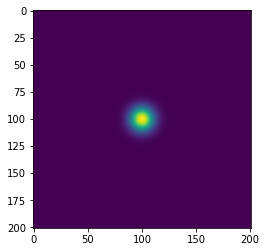

In [5]:
## generate intial conditons 
order= 2
X = np.linspace(0,lx,nx)
dx= X[1]-X[0] 
Y = np.linspace(0,ly,ny)
dy= Y[1]-Y[0]
x,y = np.meshgrid(X,Y)
u= 0*x + 0*y 
v= 0*x + 0*y 
harg= -((x-5)**2 + (y-5)**2 )/0.3 
h= 10*np.exp(harg)
fig1= plt.figure()

im = plt.imshow(h, animated=True)
plt.ion()
plt.show()



In [6]:
cfl = 0.5                         # CFL number
stepS= np.sqrt(dx**2+dy**2) 
dt= cfl*stepS/(math.sqrt(g*H))
tend= 1.1
nt = int(round(tend/dt))          # number of time steps
n = 0                             # counter
t=0 
#method = "Euler"
#method = "RK2"
method = "RK4"
iplot=10

print(nt)
#note cmap: yellow= high value, dark purple = minimum value, blue ~ 0 or midpoint value(zero here bc of symmetry)

97


In [7]:
order=4 
n=0

for t in drange(0, tend, dt):
    n = n+1
    
    #forward Euler
    if method == "Euler":
       unew = u + dt*rate(u,v,h,nx,ny,dx,dy,order,u0,v0,H,g,x,t)[0]
       vnew = v +  dt*rate(u,v,h,nx,ny,dx,dy,order,u0,v0,H,g,x,t)[1]
       hnew= h + dt*rate(u,v,h,nx,ny,dx,dy,order,u0,v0,H,g,x,t)[2]
      
       
       h = hnew 
       u = unew 
       v = vnew 
    if method == "RK4": 
        K1  = rate(u,v,h,nx,ny,dx,dy,order,u0,v0,H,g,x,t)
        K1u = K1[0]
        K1v = K1[1]
        K1h = K1[2]
       
        K2  = rate(u+dt/2*K1u,v+dt/2*K1v,h+dt/2*K1h,nx,ny,dx,dy,order,u0,v0,H,g,x,t+0.5*dt)
        K2u = K2[0]
        K2v = K2[1]
        K2h = K2[2]
      
        K3  = rate(u+dt/2*K2u,v+dt/2*K2v,h+dt/2*K2h,nx,ny,dx,dy,order,u0,v0,H,g,x,t+0.5*dt)
        K3u = K3[0]
        K3v = K3[1] 
        K3h = K3[2] 
        
        K4  = rate(u+dt*K3u,v+dt*K3v,h+dt*K3h,nx,ny,dx,dy,order,u0,v0,H,g,x,t+dt)
        K4u = K4[0]
        K4v = K4[1]
        K4h = K4[2]
        
        # corrector
        hnew = h + dt/6*(K1h + 2*K2h + 2*K3h + K4h)
        unew = u + dt/6*(K1u + 2*K2u + 2*K3u + K4u)
        vnew = v + dt/6*(K1v + 2*K2v + 2*K3v + K4v)
        h =hnew
        u = unew
        v = vnew 
        


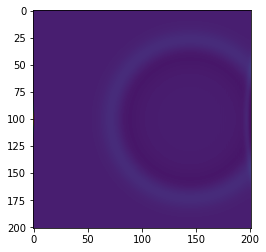

In [8]:

fig2= plt.figure()

im2 = plt.imshow(h, animated=True)
plt.ion()
plt.show()
